In [1]:
import mdtraj as md
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def open_xvg(filename):
    data = []
    raw_data = open(filename, 'r')
    for line in raw_data:
        if line[0] != '#' and line[0] != '@':
            datapt = cast_float(line.strip().split())
            data.append(datapt)
    return data
                        
def cast_float(raw_datapt):
    datapt = []
    for item in raw_datapt:
        datapt.append(float(item))
    return datapt

def plot_xvg(filename):
    datapts = open_xvg(filename)
    time, measure = [], []
    for pt in datapts:
        time.append(pt[0])
        measure.append(pt[1])
    return time, measure

In [3]:
# from Week 2
def end_end(traj):
    # get the first and last atom
    first = traj.xyz[:,0,:]
    last = traj.xyz[:,-1,:]
    # compute the distance between the first and last atom
    dist = np.sqrt(np.sum((first-last)**2, axis=1))
    return dist

In [6]:
traj = md.load_xtc('../Setup/2JOF_AMBER/gromacs/step5_centered4.xtc', top='../Setup/2JOF_AMBER/gromacs/step5_centered4.gro')

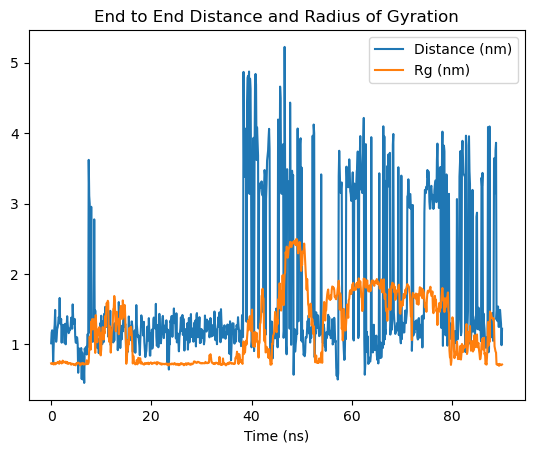

In [7]:
dist = end_end(traj)
rg = md.compute_rg(traj)

# from Week 2, plot distance vs time
plt.xlabel('Time (ns)')
#plt.ylabel('Distance (nm)')
plt.title('End to End Distance and Radius of Gyration')


# plot 
plt.plot(traj.time / 1000, dist, label='Distance (nm)')
plt.plot(traj.time / 1000, rg, label='Rg (nm)')

plt.legend()
plt.savefig('../Figures/2JOF_plots.png')
plt.show()